In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [6]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [24]:
from sklearn.preprocessing import LabelEncoder
# Initialize encoder
le = LabelEncoder()

# Convert CarName to numeric
df['CarName_encoded'] = le.fit_transform(df['CarName'])

# Check result
print(df[['CarName', 'CarName_encoded']].head())

                    CarName  CarName_encoded
0        alfa-romero giulia                2
1       alfa-romero stelvio                3
2  alfa-romero Quadrifoglio                1
3               audi 100 ls                4
4                audi 100ls                5


In [25]:
print(df[['CarName', 'CarName_encoded']].tail())

             CarName  CarName_encoded
200  volvo 145e (sw)              139
201      volvo 144ea              138
202      volvo 244dl              140
203        volvo 246              142
204      volvo 264gl              143


In [26]:
df['doornumber']=df['doornumber'].apply(lambda x: w2n.word_to_num(str(x)) if pd.notnull(x) else None)

In [27]:
df['doornumber']

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doornumber, Length: 205, dtype: int64

In [28]:
df['fueltype_encoded'] = le.fit_transform(df['fueltype'])

# Check result
print(df[['fueltype', 'fueltype_encoded']].head())

  fueltype  fueltype_encoded
0      gas                 1
1      gas                 1
2      gas                 1
3      gas                 1
4      gas                 1


In [29]:
print(df[['fueltype', 'fueltype_encoded']].tail())

    fueltype  fueltype_encoded
200      gas                 1
201      gas                 1
202      gas                 1
203   diesel                 0
204      gas                 1


In [30]:
df['aspiration_encoded'] = le.fit_transform(df['aspiration'])

# Check result
print(df[['aspiration', 'aspiration_encoded']].head())

  aspiration  aspiration_encoded
0        std                   0
1        std                   0
2        std                   0
3        std                   0
4        std                   0


In [31]:
# Find all object (categorical) columns
object_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to each
for col in object_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

print(df.head())

   car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0       1          3        2         1           0           2        0   
1       2          3        3         1           0           2        0   
2       3          1        1         1           0           2        2   
3       4          2        4         1           0           4        3   
4       5          2        5         1           0           4        3   

   drivewheel  enginelocation  wheelbase  ...  stroke  compressionratio  \
0           2               0       88.6  ...    2.68               9.0   
1           2               0       88.6  ...    2.68               9.0   
2           2               0       94.5  ...    3.47               9.0   
3           1               0       99.8  ...    3.40              10.0   
4           0               0       99.4  ...    3.40               8.0   

   horsepower  peakrpm  citympg  highwaympg    price  CarName_encoded  \
0         111     5

In [32]:
print(df.tail())

     car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
200     201         -1      139         1           0           4        3   
201     202         -1      138         1           1           4        3   
202     203         -1      140         1           0           4        3   
203     204         -1      142         0           1           4        3   
204     205         -1      143         1           1           4        3   

     drivewheel  enginelocation  wheelbase  ...  stroke  compressionratio  \
200           2               0      109.1  ...    3.15               9.5   
201           2               0      109.1  ...    3.15               8.7   
202           2               0      109.1  ...    2.87               8.8   
203           2               0      109.1  ...    3.40              23.0   
204           2               0      109.1  ...    3.15               9.5   

     horsepower  peakrpm  citympg  highwaympg    price  CarName_enco

In [42]:
df.isnull().any()

car_ID                False
symboling             False
CarName               False
fueltype              False
aspiration            False
doornumber            False
carbody               False
drivewheel            False
enginelocation        False
wheelbase             False
carlength             False
carwidth              False
carheight             False
curbweight            False
enginetype            False
cylindernumber        False
enginesize            False
fuelsystem            False
boreratio             False
stroke                False
compressionratio      False
horsepower            False
peakrpm               False
citympg               False
highwaympg            False
price                 False
CarName_encoded       False
fueltype_encoded      False
aspiration_encoded    False
dtype: bool

In [43]:
df.isnull().sum()

car_ID                0
symboling             0
CarName               0
fueltype              0
aspiration            0
doornumber            0
carbody               0
drivewheel            0
enginelocation        0
wheelbase             0
carlength             0
carwidth              0
carheight             0
curbweight            0
enginetype            0
cylindernumber        0
enginesize            0
fuelsystem            0
boreratio             0
stroke                0
compressionratio      0
horsepower            0
peakrpm               0
citympg               0
highwaympg            0
price                 0
CarName_encoded       0
fueltype_encoded      0
aspiration_encoded    0
dtype: int64

In [44]:
df.duplicated(subset=['CarName', 'fueltype', 'enginesize']).sum()

np.int64(25)

In [45]:
df.drop_duplicates(subset=['CarName', 'fueltype', 'enginesize'], inplace=True)

In [46]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_encoded,fueltype_encoded,aspiration_encoded
0,1,3,2,1,0,2,0,2,0,88.6,...,2.68,9.0,111,5000,21,27,13495.0,2,1,0
1,2,3,3,1,0,2,0,2,0,88.6,...,2.68,9.0,111,5000,21,27,16500.0,3,1,0
2,3,1,1,1,0,2,2,2,0,94.5,...,3.47,9.0,154,5000,19,26,16500.0,1,1,0
3,4,2,4,1,0,4,3,1,0,99.8,...,3.40,10.0,102,5500,24,30,13950.0,4,1,0
4,5,2,5,1,0,4,3,0,0,99.4,...,3.40,8.0,115,5500,18,22,17450.0,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,-2,143,1,1,4,3,2,0,104.3,...,3.15,7.5,162,5100,17,22,18420.0,143,1,1
199,200,-1,144,1,1,4,4,2,0,104.3,...,3.15,7.5,162,5100,17,22,18950.0,144,1,1
202,203,-1,140,1,0,4,3,2,0,109.1,...,2.87,8.8,134,5500,18,23,21485.0,140,1,0
203,204,-1,142,0,1,4,3,2,0,109.1,...,3.40,23.0,106,4800,26,27,22470.0,142,0,1


In [47]:
df.duplicated(subset=['CarName', 'fueltype', 'enginesize']).sum()

np.int64(0)

In [ ]:
df.duplicated(subset=['symboling', 'fueltype', 'enginesize']).sum()

In [90]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df[['horsepower','carlength','enginesize']] # features        \\new_df = df.drop ('Salary', axis='columns')
y = df['price']  # target  \\df.price
z = X+y
# Split for training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Features shape:", X_train.shape)
print("Target shape:", y_train.shape)

Features shape: (95, 3)
Target shape: (95,)


In [79]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,-2,volvo 145e (sw),gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [7]:
df3=df[['horsepower','carlength','enginesize','price']]

In [8]:
df3

,horsepower,carlength,enginesize,price
0,111,168.8,130,13495.0
1,111,168.8,130,16500.0
2,154,171.2,152,16500.0
3,102,176.6,109,13950.0
4,115,176.6,136,17450.0
...,...,...,...,...
200,114,188.8,141,16845.0
201,160,188.8,141,19045.0
202,134,188.8,173,21485.0
203,106,188.8,145,22470.0


In [80]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [81]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [82]:
y_pred = reg.predict(X_test)

In [67]:
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.807584755636279
Mean Absolute Error: 2849.4336887907193


TypeError: got an unexpected keyword argument 'squared'

In [83]:
reg.fit(X,y)
#reg.predict([[2,9,6]])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
X

,horsepower,carlength,enginesize
0,111,168.8,130
2,154,171.2,152
3,102,176.6,109
4,115,176.6,136
5,110,177.3,136
...,...,...,...
194,114,188.8,141
198,162,188.8,130
201,160,188.8,141
202,134,188.8,173


In [85]:
reg.predict([[115,176.6,136]])

C:\Users\STUDENT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15130.28488301])

In [86]:
r2_score(reg.predict(X),y)*100

79.38378251636318

In [87]:
df.duplicated(subset=['horsepower', 'carlength', 'enginesize']).sum()

np.int64(0)

In [76]:
df.drop_duplicates(subset=['horsepower', 'carlength', 'enginesize'], inplace=True)

In [77]:
df.duplicated(subset=['horsepower', 'carlength', 'enginesize']).sum()

np.int64(0)

In [10]:
import seaborn as sns

In [89]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,-2,volvo 145e (sw),gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


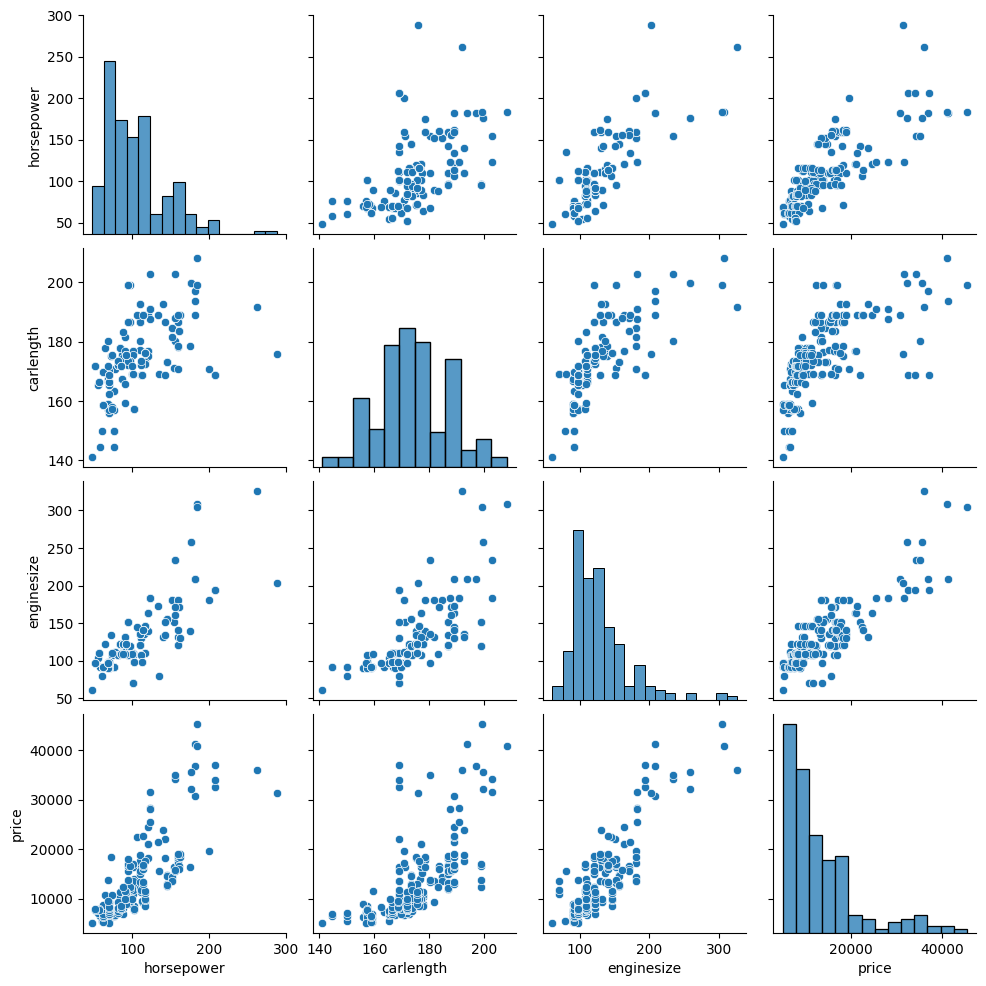

In [11]:
sns.pairplot(df3)